In [450]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

## Test 

In [452]:
df = pd.read_csv("C://Users//ACER//Downloads/test_lAUu6dG.csv")

In [453]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [454]:
df.shape

(367, 12)

In [455]:
df.duplicated().sum()

0

In [456]:
df.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [457]:
df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False])

In [458]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


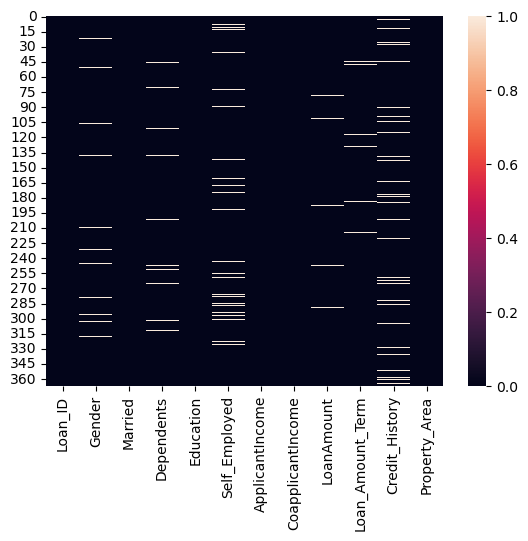

In [459]:
sns.heatmap(df.isna())
plt.show()

In [460]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0],)

In [461]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])

In [462]:
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [463]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

In [464]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [465]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [466]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [467]:
df=df.replace(to_replace='3+',value=4)

In [468]:
df['Dependents']= df['Dependents'].astype('int64')

In [469]:
num_df = df.select_dtypes(include=["int64","float64"])
cat_df = df.select_dtypes(include=[object])

In [470]:
num_df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,5720,0,110.0,360.0,1.0
1,1,3076,1500,126.0,360.0,1.0
2,2,5000,1800,208.0,360.0,1.0
3,2,2340,2546,100.0,360.0,1.0
4,0,3276,0,78.0,360.0,1.0
...,...,...,...,...,...,...
362,4,4009,1777,113.0,360.0,1.0
363,0,4158,709,115.0,360.0,1.0
364,0,3250,1993,126.0,360.0,1.0
365,0,5000,2393,158.0,360.0,1.0


In [471]:
cat_df

,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area
0,LP001015,Male,Yes,Graduate,No,Urban
1,LP001022,Male,Yes,Graduate,No,Urban
2,LP001031,Male,Yes,Graduate,No,Urban
3,LP001035,Male,Yes,Graduate,No,Urban
4,LP001051,Male,No,Not Graduate,No,Urban
...,...,...,...,...,...,...
362,LP002971,Male,Yes,Not Graduate,Yes,Urban
363,LP002975,Male,Yes,Graduate,No,Urban
364,LP002980,Male,No,Graduate,No,Semiurban
365,LP002986,Male,Yes,Graduate,No,Rural


## Train

In [473]:
ds = pd.read_csv("C://Users//ACER//Downloads/train_ctrUa4K.csv")

In [474]:
ds

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [475]:
ds.shape

(614, 13)

In [476]:
df.duplicated().sum()

0

In [477]:
ds.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [478]:
df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False])

In [479]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [480]:
ds.isna().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [481]:
ds['Gender']=ds['Gender'].fillna(ds['Gender'].mode()[0],)

In [482]:
ds['Married']=ds['Married'].fillna(ds['Married'].mode()[0])

In [483]:
ds['Dependents']=ds['Dependents'].fillna(ds['Dependents'].mode()[0])

In [484]:
ds['Self_Employed']=ds['Self_Employed'].fillna(ds['Self_Employed'].mode()[0])

In [485]:
ds['LoanAmount']=ds['LoanAmount'].fillna(ds['LoanAmount'].mean())

In [486]:
ds['Loan_Amount_Term']=ds['Loan_Amount_Term'].fillna(ds['Loan_Amount_Term'].mode()[0])

In [487]:
ds['Credit_History']=ds['Credit_History'].fillna(ds['Credit_History'].mode()[0])

In [488]:
ds.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [489]:
ds=ds.replace(to_replace='3+',value=4)
ds

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,4,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [490]:
ds['Dependents']= ds['Dependents'].astype('int64')

In [491]:
num_ds = ds.select_dtypes(include=["int64","float64"])
cat_ds = ds.select_dtypes(include=[object])

In [492]:
num_ds

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,5849,0.0,146.412162,360.0,1.0
1,1,4583,1508.0,128.000000,360.0,1.0
2,0,3000,0.0,66.000000,360.0,1.0
3,0,2583,2358.0,120.000000,360.0,1.0
4,0,6000,0.0,141.000000,360.0,1.0
...,...,...,...,...,...,...
609,0,2900,0.0,71.000000,360.0,1.0
610,4,4106,0.0,40.000000,180.0,1.0
611,1,8072,240.0,253.000000,360.0,1.0
612,2,7583,0.0,187.000000,360.0,1.0


In [493]:
cat_ds

,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,Graduate,No,Urban,Y
1,LP001003,Male,Yes,Graduate,No,Rural,N
2,LP001005,Male,Yes,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,Not Graduate,No,Urban,Y
4,LP001008,Male,No,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,LP002978,Female,No,Graduate,No,Rural,Y
610,LP002979,Male,Yes,Graduate,No,Rural,Y
611,LP002983,Male,Yes,Graduate,No,Urban,Y
612,LP002984,Male,Yes,Graduate,No,Urban,Y


In [494]:
ds['Loan_Amount_Term'] = ds['Loan_Amount_Term'].astype('int64')
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype('int64')

In [495]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Married'] = df['Married'].map({'No' : 0, 'Yes': 1})
df['Education'] = df['Education'].map({'Graduate' : 1, 'Not Graduate' : 0})
df['Self_Employed'] = df['Self_Employed'].map({'No' : 0, 'Yes' : 1})

In [496]:
ds['Gender'] = ds['Gender'].map({'Male': 1, 'Female': 0})
ds['Married'] = ds['Married'].map({'No' : 0, 'Yes': 1})
ds['Education'] = ds['Education'].map({'Graduate' : 1, 'Not Graduate' : 0})
ds['Self_Employed'] = ds['Self_Employed'].map({'No' : 0, 'Yes' : 1})

In [497]:
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term       int64
Credit_History       float64
Property_Area         object
dtype: object

In [498]:
property_area = pd.get_dummies(df['Property_Area'], prefix='Property_Area',dtype=int)
df = pd.concat([df, property_area], axis = 1)
df = df.drop('Property_Area', axis = 1)

property_area = pd.get_dummies(ds['Property_Area'], prefix='Property_Area',dtype=int)
ds = pd.concat([ds, property_area], axis = 1)
ds = ds.drop('Property_Area', axis = 1)

In [499]:
ds['Loan_Status'] = ds['Loan_Status'].map({'N' : 0, 'Y' : 1})

In [500]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001015,1,1,0,1,0,5720,0,110.0,360,1.0,0,0,1
1,LP001022,1,1,1,1,0,3076,1500,126.0,360,1.0,0,0,1
2,LP001031,1,1,2,1,0,5000,1800,208.0,360,1.0,0,0,1
3,LP001035,1,1,2,1,0,2340,2546,100.0,360,1.0,0,0,1
4,LP001051,1,0,0,0,0,3276,0,78.0,360,1.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,4,0,1,4009,1777,113.0,360,1.0,0,0,1
363,LP002975,1,1,0,1,0,4158,709,115.0,360,1.0,0,0,1
364,LP002980,1,0,0,1,0,3250,1993,126.0,360,1.0,0,1,0
365,LP002986,1,1,0,1,0,5000,2393,158.0,360,1.0,1,0,0


In [501]:
ds

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360,1.0,1,0,0,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360,1.0,0,1,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360,1.0,1,0,0,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360,1.0,1,0,0,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360,1.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.000000,360,1.0,1,1,0,0
610,LP002979,1,1,4,1,0,4106,0.0,40.000000,180,1.0,1,1,0,0
611,LP002983,1,1,1,1,0,8072,240.0,253.000000,360,1.0,1,0,0,1
612,LP002984,1,1,2,1,0,7583,0.0,187.000000,360,1.0,1,0,0,1


In [502]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [503]:
df['Loan_ID'] = df['Loan_ID'].str.replace('LP00', '')
ds['Loan_ID'] = ds['Loan_ID'].str.replace('LP00', '')

In [504]:
scaler = StandardScaler()

df['Loan_ID'] = scaler.fit_transform(df['Loan_ID'].values.reshape(-1, 1))
ds['Loan_ID'] = scaler.transform(ds['Loan_ID'].values.reshape(-1, 1))

In [505]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,-1.703096,1,1,0,1,0,5720,0,110.0,360,1.0,0,0,1
1,-1.691105,1,1,1,1,0,3076,1500,126.0,360,1.0,0,0,1
2,-1.675688,1,1,2,1,0,5000,1800,208.0,360,1.0,0,0,1
3,-1.668837,1,1,2,1,0,2340,2546,100.0,360,1.0,0,0,1
4,-1.641429,1,0,0,0,0,3276,0,78.0,360,1.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1.647478,1,1,4,0,1,4009,1777,113.0,360,1.0,0,0,1
363,1.654330,1,1,0,1,0,4158,709,115.0,360,1.0,0,0,1
364,1.662895,1,0,0,1,0,3250,1993,126.0,360,1.0,0,1,0
365,1.673173,1,1,0,1,0,5000,2393,158.0,360,1.0,1,0,0


In [506]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [507]:
for col in numerical_cols:
    df[col] = scaler.fit_transform(df[col].values.reshape(-1, 1))
    ds[col] = scaler.transform(ds[col].values.reshape(-1, 1))

In [508]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,-1.703096,1,1,0,1,0,0.186461,-0.673335,-0.429368,0.266022,1.0,0,0,1
1,-1.691105,1,1,1,1,0,-0.352692,-0.029848,-0.166482,0.266022,1.0,0,0,1
2,-1.675688,1,1,2,1,0,0.039641,0.098849,1.180807,0.266022,1.0,0,0,1
3,-1.668837,1,1,2,1,0,-0.502774,0.418877,-0.593671,0.266022,1.0,0,0,1
4,-1.641429,1,0,0,0,0,-0.311909,-0.673335,-0.955139,0.266022,1.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1.647478,1,1,4,0,1,-0.162439,0.088982,-0.380077,0.266022,1.0,0,0,1
363,1.654330,1,1,0,1,0,-0.132056,-0.369180,-0.347216,0.266022,1.0,0,0,1
364,1.662895,1,0,0,1,0,-0.317211,0.181644,-0.166482,0.266022,1.0,0,1,0
365,1.673173,1,1,0,1,0,0.039641,0.353241,0.359289,0.266022,1.0,1,0,0


In [509]:
ds

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,-1.725365,1,0,0,1,0,0.212766,-0.673335,0.168897,0.266022,1.0,1,0,0,1
1,-1.723652,1,1,1,1,0,-0.045391,-0.026416,-0.133621,0.266022,1.0,0,1,0,0
2,-1.720226,1,1,0,1,1,-0.368190,-0.673335,-1.152304,0.266022,1.0,1,0,0,1
3,-1.718513,1,1,0,0,0,-0.453223,0.338226,-0.265064,0.266022,1.0,1,0,0,1
4,-1.715087,1,0,0,1,0,0.243557,-0.673335,0.079973,0.266022,1.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.659469,0,0,0,1,0,-0.388581,-0.673335,-1.070152,0.266022,1.0,1,1,0,0
610,1.661182,1,1,4,1,0,-0.142659,-0.673335,-1.579493,-2.521639,1.0,1,1,0,0
611,1.668034,1,1,1,1,0,0.666070,-0.570377,1.920173,0.266022,1.0,1,0,0,1
612,1.669747,1,1,2,1,0,0.566355,-0.673335,0.835770,0.266022,1.0,1,0,0,1


In [510]:
ds = ds.drop('Gender',axis=1)

In [511]:
ds = ds.drop('Dependents',axis=1)

In [512]:
ds = ds.drop('Loan_ID',axis=1)

In [513]:
ds = ds.drop('Self_Employed',axis=1)

In [514]:
ds.columns

Index(['Married', 'Education', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [515]:
from sklearn.model_selection import train_test_split

In [516]:
x = ds.drop(['Loan_Status'],axis=1)
y = ds['Loan_Status']

In [517]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.597, random_state=2)

In [518]:
print(f"y_test shape: {y_test.shape}")

y_test shape: (367,)


In [519]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [520]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train) 
y_pred = knn.predict(x_test)

In [521]:
print("Shape of X:", x.shape)
print("Shape of y:", y.shape)

Shape of X: (614, 10)
Shape of y: (614,)


In [522]:
print("Shape of X_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (247, 10)
Shape of y_train: (247,)


In [523]:
print("Shape of X_train:", x_test.shape)
print("Shape of y_train:", y_test.shape)

Shape of X_train: (367, 10)
Shape of y_train: (367,)


In [524]:
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7438692098092643


In [525]:
y_pred.shape

(367,)

In [526]:
from sklearn.naive_bayes import GaussianNB
bc = GaussianNB()
bc.fit(x_train,y_train)

GaussianNB()

In [527]:
pred1 = bc.predict(x_test)

In [528]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score

In [529]:
pred1.shape

(367,)

In [530]:
print('Accuracy:',accuracy_score(pred1,y_test))
print('Precision:',precision_score(pred1,y_test,average='weighted'))
print('Recall:',recall_score(pred1,y_test,average='weighted'))
print('F1 Score:',f1_score(pred1,y_test,average='weighted'))

Accuracy: 0.7901907356948229
Precision: 0.8565871523646544
Recall: 0.7901907356948229
F1 Score: 0.8096457957660825


In [531]:
from sklearn.linear_model import LogisticRegression 

In [532]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [533]:
pred2 = model.predict(x_test)
accuracy_score(y_test,pred2)

0.8092643051771117

In [534]:
from sklearn.ensemble import RandomForestClassifier

RFC =RandomForestClassifier()

In [535]:
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [536]:
pred3 = model.predict(x_test)
Rfc_acc = accuracy_score(y_test,pred3)
Rfc_acc

0.8092643051771117

In [537]:
test_df = pd.read_csv("C://Users//ACER//Downloads/test_lAUu6dG.csv")
submission = pd.read_csv("C://Users//ACER//Downloads/sample_submission_49d68Cx.csv")

submission['Loan_ID'] = test_df['Loan_ID']
submission['Loan_Status'] = pred3

In [538]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_5196\3472823661.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  submission['Loan_Status'].replace(0, 'N', inplace=True)


In [539]:
submission

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [540]:
submission.to_csv("C://Users//ACER//Downloads/submission.csv", index=False)